# **Aufgabe 2 - Laserintensität**

Mit Hilfe von Lasern können z.B. metallische Oberflächen mit einer hohen räumlichen Auflösung bearbeitet werden. Folgende Abbildung stellt die gemessene, örtliche Intensitätverteilung eines Laserstrahls über seinen Radius dar, der für die Oberflächenstrukturierung eingesetzt wird:

![alt text](Abbildungen/laser_intensity.png)

Die Rohdaten dieser Verteilung sind in der Datei `intensity.csv` im Ordner `Daten` geben.

### **Teilaufgaben**

1. Will man diese Intensitätverteilung für eine numerische Simulation nutzen, müssen die Datenpunkte auf ein äquidistantes Rechengitter interpoliert werden. Interpolieren Sie die gegebene Intensitätsverteilung linear auf eine örtliche Auflösung von 0,1 µm in einem Intervall 0 - 10 µm. Nutzen Sie dazu *nicht* eine eigen geschriebene Funktion, sondern verwenden Sie die Funktion [`interp()`](https://docs.scipy.org/doc/scipy/tutorial/interpolate/1D.html#tutorial-interpolate-1dsection) aus dem `Numpy`-Modul.
2. Erweitern Sie ihr Skript, sodass die Interpolation zusätzlich mit Hilfe der Lagrange Interpolation zur Berechnung höhergradiger Polynome durchgeführt wird.
3. Stellen Sie beide Interpolationen in einem Diagramm dar. Welches der beiden Verfahren ist für diese Aufgabe besser geeignet? Begründen Sie ihre Aussage.

### **Lösung** - Aufgabe 2

### ***Algorithmische Lösung technischer Problem WS 2024/25***

### Studenten:

+ #### **Diego Espinosa**, MN: 61505, Studiengang: BENG
+ #### **Imad Sghir**, MN: 71767, Studiengang: BENG

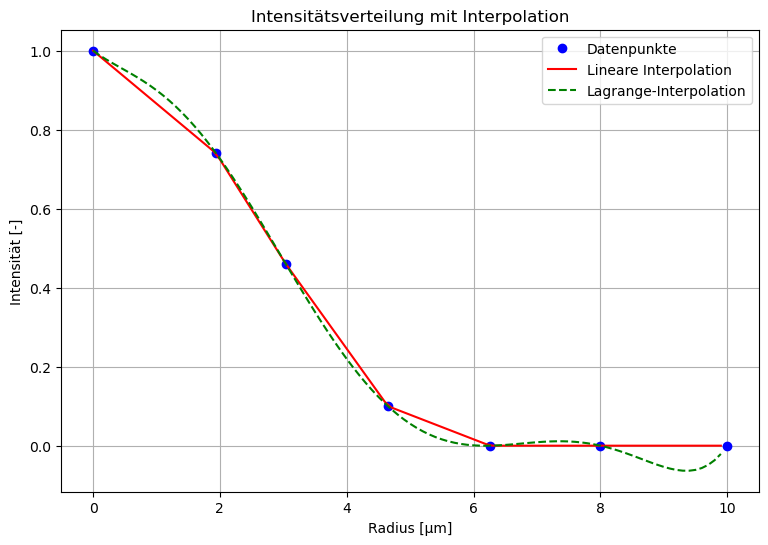

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Daten einlesen
radius, intensität = np.genfromtxt('Daten/laser_intensity.csv', delimiter=",", unpack=True)

#Teil 1: Interpolation mit der Funktion interp()

# Äquidistantes Gitter erstellen
radius_neu = np.arange(0, 10, 0.1) # von 0 bis 10 µm in Schritten von 0.1 µm
intensität_neu_linear = np.interp(radius_neu, radius, intensität) # Lineare Interpolation

# Teil 2: Interpolation mit Lagrange zur Berechnung höhergradiger Polynome
lagrange_poly = lagrange(radius, intensität)
intensität_neu_lagrange = lagrange_poly(radius_neu)

# Teil 3: Beide Interpolationen im Diagramm darstellen
plt.figure(figsize=(9, 6))
plt.plot(radius, intensität, 'o', label='Datenpunkte', color='blue')
plt.plot(radius_neu, intensität_neu_linear, '-', label='Lineare Interpolation', color='red')
plt.plot(radius_neu, intensität_neu_lagrange, '--', label='Lagrange-Interpolation', color='green')
plt.title('Intensitätsverteilung mit Interpolation')
plt.xlabel('Radius [µm]')
plt.ylabel('Intensität [-]')
plt.legend()
plt.grid() 
plt.show()

### Aufhürliche Erläuterung des Codes.

### **Teil 0:**

#### 1. Importieren der Bibliotheken:

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, lagrange
```
+ ```numpy``` wird für numerische Berechnungen und Array-Manipulationen verwendet.
+ ```matplotlib.pyplot``` wird für die grafische Darstellung von Daten verwendet.
+ ```scipy.interpolate``` enthält Funktionen für die Interpolation, einschließlich der linearen Interpolation und der Lagrange-Interpolation.

#### 2. Daten einlesen:

```python
radius, intensität = np.genfromtxt('Daten/laser_intensity.csv', delimiter=",", unpack=True)
```

+ Hier wird die Funktion ```np.genfromtxt``` verwendet, um die Daten aus einer CSV-Datei namens ```laser_intensity.csv``` zu laden, die sich im Ordner ```Daten``` befindet.
+ Die Parameter ```delimiter=","``` spezifizieren, dass die Werte durch Kommas getrennt sind, und ```unpack=True``` sorgt dafür, dass die Daten in zwei separate Variablen (```radius``` und ```intensität```) aufgeteilt werden.

### **Teil 1:**

#### 3. Äquidistantes Gitter erstellen:

```python
radius_neu = np.arange(0, 10, 0.1)
```

+ Mit ```np.arange(0, 10, 0.1)``` wird ein neuer Array (```radius_neu```) erstellt, der Werte von 0 bis 10 µm in Schritten von 0.1 µm enthält. Dies dient als neues Gitter für die Interpolation.

#### 4. Lineare Interpolation:

```python
intensität_neu_linear = np.interp(radius_neu, radius, intensität)
```

+ Die Funktion ```np.interp``` wird verwendet, um die Intensität für die neuen Radiuswerte (```radius_neu```) linear zu interpolieren. Die Eingaben sind die neuen Radien, die ursprünglichen Radien und die zugehörigen Intensitätswerte.
+ Das Ergebnis ist ein Array (```intensität_neu_linear```), das die interpolierten Intensitätswerte für die neuen Radien enthält.

### **Teil 2:**

#### 5. Lagrange-Interpolation:

```python
lagrange_poly = lagrange(radius, intensität)
```

+ Hier wird die Funktion ```lagrange``` verwendet, um ein Lagrange-Polynom basierend auf den ursprünglichen Radius- und Intensitätsdaten zu berechnen. Dieses Polynom wird später verwendet, um die Intensität für die neuen Radien zu bestimmen.

#### 6. Berechnung der Lagrange-Interpolierten Intensität:

```python
intensität_neu_lagrange = lagrange_poly(radius_neu)
```

+ Mit dem zuvor berechneten Lagrange-Polynom wird die Intensität für die neuen Radien (```radius_neu```) berechnet. Das Ergebnis wird in ```intensität_neu_lagrange``` gespeichert.


### **Teil 3:**

#### 7. Grafik erstellen:

```python
plt.figure(figsize=(10, 7))
```

+ Hier wird eine neue Figur für das Diagramm mit einer bestimmten Größe (10x7 Zoll) erstellt.


#### 8. Daten plotten:

```python
plt.plot(radius, intensität, 'o', label='Datenpunkte', color='blue')
plt.plot(radius_neu, intensität_neu_linear, '-', label='Lineare Interpolation', color='red')
plt.plot(radius_neu, intensität_neu_lagrange, '--', label='Lagrange-Interpolation', color='green')
```

+ Es werden drei Linien gezeichnet:
    + Die Originaldaten werden als Punkte (Kreise) angezeigt. Blue color.
    + Die Linie für die lineare Interpolation (durchgezogene Linie). Red color.
    + Die Linie für die Lagrange-Interpolation (gestrichelte Linie). Green color.


#### 9. Diagramm anpassen und anzeigen:

```python
plt.title('Intensitätsverteilung mit Interpolation')
plt.xlabel('Radius (µm)')
plt.ylabel('Intensität')
plt.legend()
plt.grid() 
plt.show()
```

+ Der Titel, die Achsenbeschriftungen und die Legende werden hinzugefügt, um das Diagramm informativ zu gestalten.
+ ```plt.grid()``` fügt ein Raster hinzu, um die Lesbarkeit zu verbessern.
+ Schließlich wird mit ```plt.show()``` das Diagramm angezeigt.